# Modeling: 

## Decision Trees

![Modeling](https://user-images.githubusercontent.com/67468718/111879997-1bbd6a80-8966-11eb-92c1-01c38cbdbe4a.JPG)



## Contents<a id='Contents'></a>
 * [1. Introduction](#1_Introduction)
 * [2. Sourcing and Loading](#2_Sourcing_and_Loading)
    * [2.1 Import relevant libraries](#2.1_Import_relevant_libraries)
    * [2.2 Load the data](#2.2_Load_the_data)
 * [3. View and Visualize our dependent variable 'price'](#3._View_and_Visualize_our_dependent_variable_price)
    * [3.1 View the data](#3.1_View_the_data)
    * [3.2 Final Visualization of our dependent Variable 'price'](#3.2_Final_Visualization_of_our_dependent_variable_price)
 * [4. Features Selection: Define/Select Features](#4_Features_Selection:_Define_Select_Features)
 * [5. Train/Test Split](#5_Train/Test_Split)
 * [6. Scaling and Transformation: Standardization](#6_Scaling_and_Transformation:_Standardization)
 * [7. Modeling: Decision Tree Regression](#7_Decision_Tree_Regression)
    * [7.1 Fitting Decision Tree Regression](#7.1_Fitting_Decision_Tree_Regression)
    * [7.2 Decision Tree Regression (Base) Visualization](#7.2_Decision_Tree_Regression_(Base):_Visualization)
    * [7.3 Decision Tree Regression: Residuals Visualization](#7.3_Decision_Tree_Regression:_Residuals_Visualization)
    * [7.4 Decision Tree Regression Model Evaluation](#7.4_Decision_Tree_Regression_Model_Evaluation)
    * [7.5 Features Selection](#7.5_Features_Selection)
       * [7.5.1 Features Importance](#7.5.1_Features_Importance)
       * [7.5.2 Keeping only 'price_per_sqft' and 'sqft'](#7.5.2_Keeping_only_price_per_sqft_and_sqft)
       * [7.5.3 Keeping 'price_per_sqft', 'sqft', 'property_type', 'lot_size' and 'AvgRoomSize'](#7.5.3_Keeping_price_per_sqft_sqft_property_type_lot_size_AvgRoomSize)    
       * [7.5.4 Features Selection Summary](#7.5.4_Features_Selection_Summary)    
    * [7.6 Hyperparameters Tuning: GridSearchCV](#7.6_Hyperparameters_Tuning:_GridSearchCV)
       * [7.6.1 GridSearchCV for all features](#7.6.1_GridSearchCV_for_all_features)
       * [7.6.2 Fitting Decision Tree Regression after GridsearchCV (All features)](#7.6.2_Fitting_Decision_Tree_Regression_after_GridsearchCV_(All_features))
       * [7.6.3 GridSearchCV for most important features: 'sqft' and 'price_per_sqft'](#7.6.3_GridSearchCV_for_most_important_features:_sqft_and_price_per_sqft)
       * [7.6.4 Fitting Decision Tree Regression after GridsearchCV (most important features)](#7.6.4_Fitting_Decision_Tree_Regression_after_GridsearchCV_(most_important_features))
 * [8. Decision Tree Regression Tuning Summary](#8_Decision_Tree_Regression_Tuning_Summary)
 * [9. Decision Tree Regression Actual vs Prediction Visualization](#9_Decision_Tree_Regression_Actual_vs_Prediction_Visualization)
 * [10. Models next step](#10_Models_next_step)

## 1. Introduction<a id='1_Introduction'></a>

Here comes the really fun step: modeling! For this step, we'll be:
 * Training multiple Regression algorithms.
 * Apply hyperparameters tuning where applicable to ensure every algorithm will result in best prediction possible.
 * Finally, evaluate these Models.

**Regression Models:**
 * Linear Regression (Baseline Model).
 * Ridge Regression (L2 Regularization)
 * Lasso Regression (L1 Regularization)
 * Decision Trees
 * Random Forests
 * GB
 * XGBoost
 * Support Vector Regression
 * Stacking
 * Neural networks.
 
 
 **In This Notebook, We'll be using Decision Trees**



## 2. Sourcing and Loading<a id='2_Sourcing_and_Loading'></a> 

### 2.1 Import relevant libraries<a id='2.1_Import_relevant_libraries'></a> 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os 

plt.style.use('ggplot')

print('***Libraries are imported***')

***Libraries are imported***


### 2.2 Load the data<a id='2.2_Load_the_data'></a>

In [ ]:
# Check Current Directory:
os.getcwd()

In [5]:
# Changing the directory:
os.chdir(r"path/Feature_Engineering/datasets")

In [ ]:
#Confirm the directory:
os.getcwd()

In [7]:
# List files/folders in the cd:
os.listdir()

['pre_processing_df.csv']

In [8]:
df = pd.read_csv('pre_processing_df.csv')

## 3. View and Visualize our dependent variable 'price'<a id='3._View_and_Visualize_our_dependent_variable_price'></a>

### 3.1 View the data<a id='3.1_View_the_data'></a>

In [9]:
#Let's check the df shape:
structure = df.shape
print("Final DataFrame 'df' has Rows:", structure[0], "and Columns: ", structure[1])

Final DataFrame 'df' has Rows: 7484 and Columns:  23


In [10]:
#Let's check the df shape:
df.head()

property_type  zipcode    price  beds  baths  sqft  lot_size  \
0              1    94568   905000     3      4  1994         0   
1              2    94566   645000     2      2  1221      1237   
2              1    94588   940000     4      2  1928      2660   
3              0    94588  1036000     3      2  1355      7708   
4              0    94568  1250000     4      4  3083      3058   

   days_on_market  price_per_sqft  hoa_month  ...  median_income  \
0              80             454      388.0  ...         119637   
1             143             528      379.0  ...         126782   
2             148             488      470.0  ...         134451   
3              66             765       33.0  ...         134451   
4             143             405      232.0  ...         119637   

   hotness_score  supply_score  demand_score  university_count  barts  malls  \
0          83.72         94.25         73.19                 0      1      0   
1          80.07         79.57         80.57                 0      0      1   
2          85.91         87.06         84.76                 0      1      1   
3          85.91         87.06         84.76                 0      1      1   
4          83.72         94.25         73.19                 0      1      0   

   universities  bedBath  AvgRoomSize  
0             0       12      284.857  
1             0        4      305.250  
2             0        8      321.333  
3             0        6      271.000  
4             0       16      385.375  

[5 rows x 23 columns]

In [11]:
# Summary Statistics:
df.describe()['price'].round(2)

count       7484.00
mean      887769.19
std       387091.45
min       165000.00
25%       590000.00
50%       808000.00
75%      1150000.00
max      1955000.00
Name: price, dtype: float64

### 3.2 Final Visualization of our dependent Variable 'price'<a id='3.2_Final_Visualization_of_our_dependent_variable_price'></a>

C:\Users\aktha\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


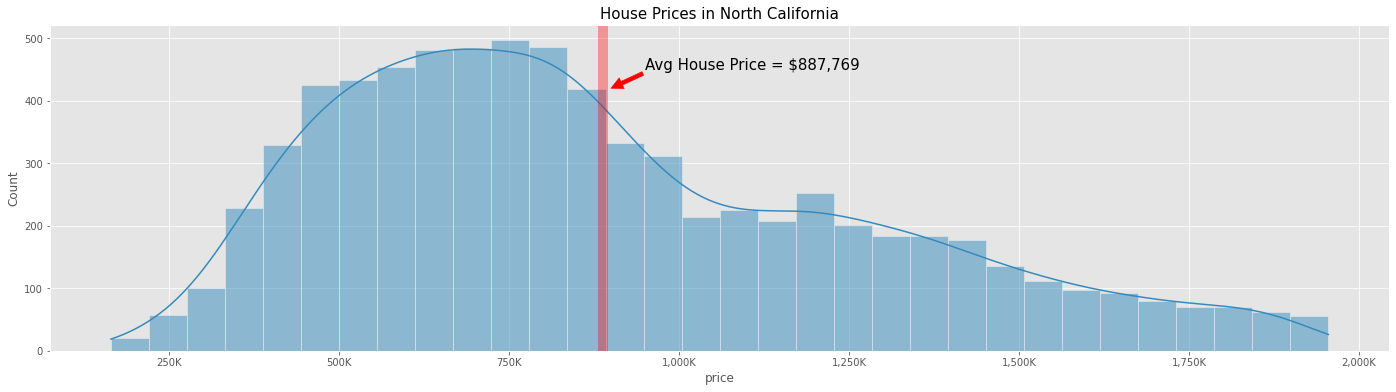

In [12]:
# Making a histogram of the price variable and adding average house sale:
f, ax = plt.subplots(figsize = (24,6))
ax = sns.histplot(x=df['price'], kde=True)
ax.axvline(df['price'].mean(), color='red', ls='-', alpha=0.35, lw=10)
plt.annotate('Avg House Price = $887,769', xy=(900000, 420), xytext=(950000, 450), arrowprops={'color':'red'}, fontsize=15)
ax.set_title('House Prices in North California', fontsize=15)
xlabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_xticks()/1000]
ax.set_xticklabels(xlabels)
plt.grid(True)

## 4. Features Selection: Define/Select Features<a id='4_Features_Selection:_Define/Select_Features'></a>


In [13]:
# let's check our final df columns:
df.columns

Index(['property_type', 'zipcode', 'price', 'beds', 'baths', 'sqft',
       'lot_size', 'days_on_market', 'price_per_sqft', 'hoa_month',
       'property_age', 'school_rating', 'school_count', 'median_income',
       'hotness_score', 'supply_score', 'demand_score', 'university_count',
       'barts', 'malls', 'universities', 'bedBath', 'AvgRoomSize'],
      dtype='object')

In [14]:
# Let's define/select our features:
features = ['property_type', 'zipcode', 'beds', 'baths', 'sqft', 'lot_size', 
            'days_on_market', 'price_per_sqft', 'hoa_month', 'property_age', 
            'school_rating', 'school_count', 'median_income', 'hotness_score', 
            'supply_score', 'demand_score', 'university_count', 'barts', 
            'malls', 'universities', 'bedBath', 'AvgRoomSize']

# And, Now let's define X and y:
X = df[features]
y = df.price

## 5. Train/Test Split<a id='5_Train/Test_Split'></a>

Now, let's split our data (X) into training and testing splits, without letting a model learn anything about the test split.

let's have 75/25 Train/Test split

In [15]:
# Import train_test_split
from sklearn.model_selection import train_test_split


# Split into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=1981)

## 6. Scaling and Transformation: Standardization<a id='6_Scaling_and_Transformation:_Standardization'></a>

**Standardization** finds the mean of our data and centers the distribution around it, calculating the number of standard deviations away from the mean each point is. The number of standard deviations are then used as our new values. This centers the data around 0 but technically has no limit to the maximum and minimum values.



In [16]:
# Import StandardScaler:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler:
scaler = StandardScaler()

# Fit & transform  scaler to the data:
X_train = scaler.fit_transform(X_train.astype(np.float))
X_test = scaler.transform(X_test.astype(np.float))


In [18]:
# Import StandardScaler:
from sklearn.preprocessing import MinMaxScaler

# Instantiate StandardScaler:
mm_scaler = MinMaxScaler()

# Fit & transform  scaler to the data:
X_train = mm_scaler.fit_transform(X_train.astype(np.float))
X_test = mm_scaler.transform(X_test.astype(np.float))

## 7. Modeling: Decision Tree Regression<a id='7_Decision_Tree_Regression'></a>

Decision Tree is a decision-making tool that uses a flowchart-like tree structure or is a model of decisions and all of their possible results, including outcomes, input costs and utility.

Decision-tree algorithm falls under the category of supervised learning algorithms. It works for both continuous as well as categorical output variables.

The branches/edges represent the result of the node and the nodes have either:

 * Conditions (Decision Nodes).
 * Result (End Nodes)

### 7.1 Fitting  Decision Tree Regression<a id='7.1_Fitting_Decision_Tree_Regression'></a>


In [19]:
# Import necessary modules
from sklearn.tree import DecisionTreeRegressor

# Create a ridge regressor: dtg
# Default: max_depth=None, max_leaf_nodes=None, criterion='mse', min_samples_split=2, min_samples_leaf=1 and max_features=None
dtg = DecisionTreeRegressor(random_state=1981) 

# Fit the regressor to the training data
dtg.fit(X_train, y_train)

# Evaluate the model: R-Squared coefficient
print("R-Squared coefficient : {:.4f}".format(dtg.score(X_test, y_test) * 100), '%')

R-Squared coefficient : 98.7877 %


Decision Tree R-Squared coefficient is clearly higher 98.7877 % compared to all previous regression Models (Linear, Ridge and Lasso).

In [20]:
# Predict on the test data: y_pred_dtg
y_pred_dtg = dtg.predict(X_test)

### 7.2 Decision Tree Regression (Base): Visualization<a id='7.2_Decision_Tree_Regression_(Base):_Visualization'></a>

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.136761 to fit



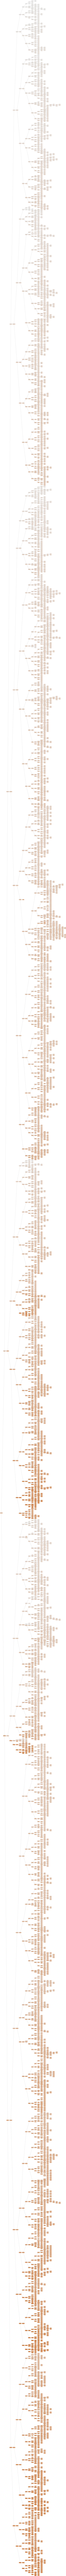

In [21]:
from sklearn import tree
from IPython.display import Image 
from io import StringIO  
import pydotplus

# Now we want to visualize the tree
dot_data = StringIO()

# We can do so with export_graphviz
tree.export_graphviz(dtg, out_file=dot_data, 
                     filled=True, rounded=True, rotate =True,
                     special_characters=True, feature_names=X.columns) 

# Alternatively for class_names use entr_model.classes_
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### 7.3 Decision Tree Regression: Residuals Visualization<a id='7.3_Decision_Tree_Regression:_Residuals_Visualization'></a>

C:\Users\aktha\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

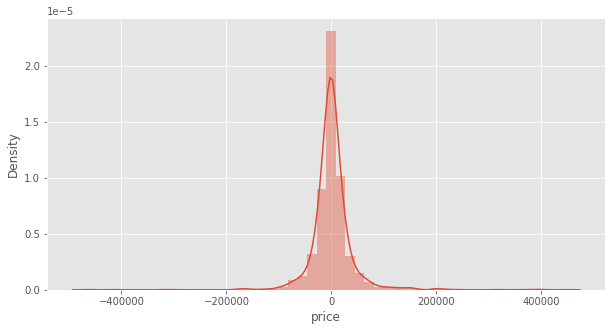

In [22]:
# visualizing residuals
fig = plt.figure(figsize=(10, 5))
residuals = (y_test-y_pred_dtg)
sns.distplot(residuals)

As we can see above by visualizing the residual we can see that is normally distributed which is a good indication that we're having a linear relationship with our dependent variable 'price'.

### 7.4 Decision Tree Regression Model Evaluation<a id='7.4_Decision_Tree_Regression_Model_Evaluation'></a>

In [23]:
from sklearn import metrics

print("********Decision Tree Regression Model Evaluation********")
print("-------------------------------------------------")
print("Decision Tree Regression - r2 Score: {:.4f}".format(metrics.r2_score(y_test, y_pred_dtg) * 100), '%')
print("-------------------------------------------------")
print("Decision Tree Regression - MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_dtg)))
print("-------------------------------------------------")
print("Decision Tree Regression - MSE:{:.4f}".format(metrics.mean_squared_error(y_test, y_pred_dtg)))
print("-------------------------------------------------")
print("Decision Tree Regression - RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_dtg))))
print("-------------------------------------------------")
print("Decision Tree Regression - Variance Score:{:.4f}".format( metrics.explained_variance_score(y_test, y_pred_dtg) * 100), '%')
print("-------------------------------------------------")

********Decision Tree Regression Model Evaluation********
-------------------------------------------------
Decision Tree Regression - r2 Score: 98.7877 %
-------------------------------------------------
Decision Tree Regression - MAE: 22346.9022
-------------------------------------------------
Decision Tree Regression - MSE:1791304373.7595
-------------------------------------------------
Decision Tree Regression - RMSE:42323.8039
-------------------------------------------------
Decision Tree Regression - Variance Score:98.7884 %
-------------------------------------------------


As we can see, the value of **root mean squared error (RMSE) is 42,323.8039**, which is slightly less than 5% of the mean value of the Sales Price i.e.  $887,769.19. also, we have very good variance score at 98.7884%. 

This mean that our base Decision Tree Regression Model is performing way much better than Linear, Ridge and lasso Regression Models.


### 7.5 Features Selection<a id='7.5_Features_Selection'></a>

As shown below let's try to improve predictions by keeping high importants features only: 

#### 7.5.1 Features Importance<a id='7.5.1_Features_Importance'></a> 


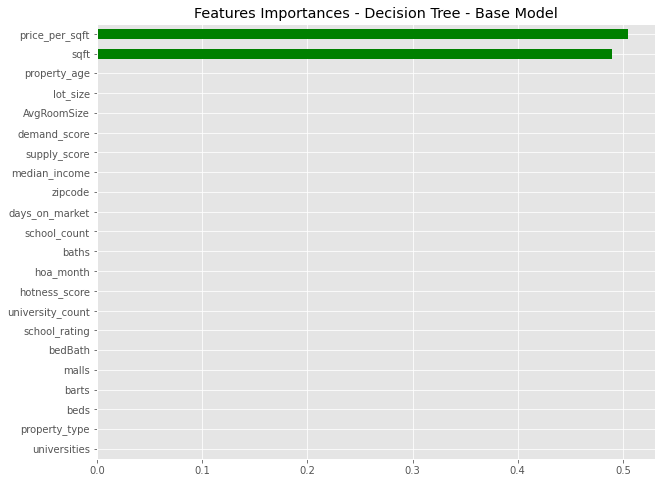

In [24]:
# First, let's create a pd.Series of features importances
importances_dtg = pd.Series(data=dtg.feature_importances_, index=X.columns)

# Sort importances
importances_sorted = importances_dtg.sort_values()

# Draw a horizontal barplot of importances_sorted
plt.figure(figsize=(10, 8))
importances_sorted.plot(kind='barh', color='green')
plt.title('Features Importances - Decision Tree - Base Model')
plt.grid(True)
plt.show()

**Dropping Features:**
 * As shown above, the high important features are only: 'price_per_sqft' and 'sqft' so as a first step let's keep them and drop the remaining features.
 * Second, let's keep  'price_per_sqft', 'sqft', 'property_type', 'lot_size' and 'AvgRoomSize'.

 
#### 7.5.2 Keeping only 'price_per_sqft' and 'sqft'<a id='7.5.2_Keeping_only_price_per_sqft_and_sqft'></a> 

In [25]:
# So Now, Let's re define/select our features and keep only high Coefficients:
# let's keep only  'sqft', 'price_per_sqft':
features = ['sqft', 'price_per_sqft']

# And, Now let's define X and y:
X = df[features]
y = df.price

In [26]:
# Import train_test_split
from sklearn.model_selection import train_test_split


# Split into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=1981)

In [27]:
# Import StandardScaler:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler:
scaler = StandardScaler()

# Fit & transform  scaler to the data:
X_train = scaler.fit_transform(X_train.astype(np.float))
X_test = scaler.transform(X_test.astype(np.float))

In [28]:
# Create a decision tree regressor: dtg_2
dtg_2 = DecisionTreeRegressor(random_state=1981)

# Fit the regressor to the training data
dtg_2.fit(X_train, y_train)

# Evaluate the model: R-Squared coefficient
print("R-Squared coefficient Tuned: {:.4f}".format(dtg_2.score(X_test, y_test) * 100), '%')

# Predict on the test data: y_pred_dtg_2
y_pred_dtg_2 = dtg_2.predict(X_test)

R-Squared coefficient Tuned: 99.2406 %


In [29]:
print("********Tuned Decision Tree Regression Model Evaluation********")
print("-------------------------------------------------------")
print("Tuned Decision Tree Regression - r2 Score: {:.4f}".format(metrics.r2_score(y_test, y_pred_dtg_2) * 100), '%')
print("-------------------------------------------------------")
print("Tuned Decision Tree Regression - MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_dtg_2)))
print("-------------------------------------------------------")
print("Tuned Decision Tree Regression - MSE:{:.4f}".format(metrics.mean_squared_error(y_test, y_pred_dtg_2)))
print("-------------------------------------------------------")
print("Tuned Decision Tree Regression - RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_dtg_2))))
print("-------------------------------------------------------")
print("Tuned Decision Tree Regression - Variance Score:{:.4f}".format( metrics.explained_variance_score(y_test, y_pred_dtg_2) * 100), '%')
print("-------------------------------------------------------")

********Tuned Decision Tree Regression Model Evaluation********
-------------------------------------------------------
Tuned Decision Tree Regression - r2 Score: 99.2406 %
-------------------------------------------------------
Tuned Decision Tree Regression - MAE: 15058.3533
-------------------------------------------------------
Tuned Decision Tree Regression - MSE:1122033204.6526
-------------------------------------------------------
Tuned Decision Tree Regression - RMSE:33496.7641
-------------------------------------------------------
Tuned Decision Tree Regression - Variance Score:99.2412 %
-------------------------------------------------------


#### 7.5.3 Keeping 'price_per_sqft', 'sqft', 'property_type', 'lot_size' and 'AvgRoomSize'<a id='7.5.3_Keeping_price_per_sqft_sqft_property_type_lot_size_AvgRoomSize'></a> 

In [30]:
df.columns

Index(['property_type', 'zipcode', 'price', 'beds', 'baths', 'sqft',
       'lot_size', 'days_on_market', 'price_per_sqft', 'hoa_month',
       'property_age', 'school_rating', 'school_count', 'median_income',
       'hotness_score', 'supply_score', 'demand_score', 'university_count',
       'barts', 'malls', 'universities', 'bedBath', 'AvgRoomSize'],
      dtype='object')

In [31]:
# So Now, Let's re define/select our features and keep only high Coefficients:
# let's keep only  'price_per_sqft', 'sqft', 'property_type', 'lot_size' and 'AvgRoomSize':
features = ['sqft', 'price_per_sqft', 'property_type', 
            'lot_size', 'AvgRoomSize']

# And, Now let's define X and y:
X = df[features]
y = df.price

In [32]:
# Import train_test_split
from sklearn.model_selection import train_test_split


# Split into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=1981)

In [33]:
# Create a decision tree regressor: dt_5
dtg_5 = DecisionTreeRegressor(random_state=1981) # max_depth=None (Default)

# Fit the regressor to the training data
dtg_5.fit(X_train, y_train)

# Evaluate the model: R-Squared coefficient
print("R-Squared coefficient Tuned: {:.4f}".format(dtg_5.score(X_test, y_test) * 100), '%')

# Predict on the test data: y_pred_dtg_5
y_pred_dtg_5 = dtg_5.predict(X_test)

R-Squared coefficient Tuned: 98.7992 %


In [34]:
print("********Tuned Decision Tree Regression Model Evaluation********")
print("-------------------------------------------------------")
print("Tuned_5 Decision Tree Regression - r2 Score: {:.4f}".format(metrics.r2_score(y_test, y_pred_dtg_5) * 100), '%')
print("-------------------------------------------------------")
print("Tuned_5 Decision Tree Regression - MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_dtg_5)))
print("-------------------------------------------------------")
print("Tuned_5 Decision Tree Regression - MSE:{:.4f}".format(metrics.mean_squared_error(y_test, y_pred_dtg_5)))
print("-------------------------------------------------------")
print("Tuned_5 Decision Tree Regression - RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_dtg_5))))
print("-------------------------------------------------------")
print("Tuned_5 Decision Tree Regression - Variance Score:{:.4f}".format( metrics.explained_variance_score(y_test, y_pred_dtg_5) * 100), '%')
print("-------------------------------------------------------")

********Tuned Decision Tree Regression Model Evaluation********
-------------------------------------------------------
Tuned_5 Decision Tree Regression - r2 Score: 98.7992 %
-------------------------------------------------------
Tuned_5 Decision Tree Regression - MAE: 19343.5318
-------------------------------------------------------
Tuned_5 Decision Tree Regression - MSE:1774295512.9909
-------------------------------------------------------
Tuned_5 Decision Tree Regression - RMSE:42122.3873
-------------------------------------------------------
Tuned_5 Decision Tree Regression - Variance Score:98.7997 %
-------------------------------------------------------


#### 7.5.4 Features Selection Summary<a id='7.5.4_Features_Selection_Summary'></a>

As we can see below, when we're dropping 2 features ('malls', 'university_count'): we're seeing the best Result for Ridge regression. 

|Features Selection| r2 Score|    MAE  | MSE  | RMSE|Variance Score|
|:----------------------|:-------:|:-------:|:----:|:----:|:----:|
|Baseline (all features)|98.7877 %|22346.9022|1791304373.7595|42323.8039|98.7884 %|
|Keeping 2 features (Most Important)    |99.2406 %|15058.3533|1122033204.6526|33496.7641|99.2412 %|
|Keeping 5 features    |98.7992 %|19343.5318|1774295512.9909|42122.3873|98.7997 %|

### 7.6 Hyperparameters Tuning: GridSearchCV<a id='7.6_Hyperparameters_Tuning:_GridSearchCV'></a>

#### 7.6.1 GridSearchCV for all features:<a id='7.6.1_GridSearchCV_for_all_features'></a>

In [35]:
# Let's define/select our features:
features = ['property_type', 'zipcode', 'beds', 'baths', 'sqft', 'lot_size', 
            'days_on_market', 'price_per_sqft', 'hoa_month', 'property_age', 
            'school_rating', 'school_count', 'median_income', 'hotness_score', 
            'supply_score', 'demand_score', 'university_count', 'barts', 
            'malls', 'universities', 'bedBath', 'AvgRoomSize']

# And, Now let's define X and y:
X = df[features]
y = df.price

# Import train_test_split
from sklearn.model_selection import train_test_split


# Split into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=1981)

# Import StandardScaler:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler:
scaler = StandardScaler()

# Fit & transform  scaler to the data:
X_train = scaler.fit_transform(X_train.astype(np.float))
X_test = scaler.transform(X_test.astype(np.float))

In [36]:
# Import necessary modules
from sklearn.model_selection import GridSearchCV

max_depth = range(1,30)

# Set the parameters by cross-validation
params = [{'max_depth': max_depth}]

# Create a DecisionTreeRegressor regressor: dtg_search_1
dtg_search_1 = DecisionTreeRegressor(random_state=1981)

#cross validation
folds = 5

# Setup the GridSearchCV object: dtg_cv_all
dtg_cv_all = GridSearchCV(estimator = dtg_search_1, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, n_jobs=-1,
                        return_train_score=True,
                        verbose = 1)   

# Fit it to the training data
dtg_cv_all.fit(X_train, y_train)



Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1981),
             n_jobs=-1, param_grid=[{'max_depth': range(1, 30)}],
             return_train_score=True, scoring='r2', verbose=1)

In [37]:
#checking the value of optimum number of parameters
print("Tuned Decision Tree Regression Parameters: {}".format(dtg_cv_all.best_params_))
print("Tuned Decision Tree - Best neg_mean_absolute_error is {:.4f}".format(dtg_cv_all.best_score_ * 100), "%")

Tuned Decision Tree Regression Parameters: {'max_depth': 10}
Tuned Decision Tree - Best neg_mean_absolute_error is 98.4238 %


In [38]:
cv_results = pd.DataFrame(dtg_cv_all.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.008196      0.000403         0.001006    4.005432e-06   
1        0.011602      0.001356         0.000802    4.007598e-04   
2        0.012997      0.000893         0.001002    1.183479e-06   
3        0.021000      0.001097         0.001000    3.084366e-06   
4        0.026199      0.001600         0.001002    2.183060e-06   
5        0.034398      0.001019         0.001002    1.237941e-06   
6        0.040196      0.002039         0.001004    3.801562e-06   
7        0.045998      0.004050         0.001001    2.929348e-06   
8        0.052798      0.008208         0.001201    4.014296e-04   
9        0.057398      0.005677         0.001200    4.001634e-04   
10       0.062398      0.006829         0.001001    1.237941e-06   
11       0.068999      0.006422         0.001200    3.979456e-04   
12       0.080999      0.013756         0.001602    7.991559e-04   
13       0.086801      0.013470         0.001401    4.891083e-04   
14       0.086999      0.010808         0.001603    4.905257e-04   
15       0.107196      0.018432         0.003002    1.789793e-03   
16       0.081201      0.005811         0.001400    8.016925e-04   
17       0.080198      0.004665         0.001001    9.887906e-07   
18       0.076999      0.003577         0.001602    4.898290e-04   
19       0.075997      0.004097         0.001402    4.902150e-04   
20       0.082200      0.011178         0.001400    4.907979e-04   
21       0.076999      0.003163         0.001002    1.482036e-06   
22       0.072200      0.000749         0.001202    4.009066e-04   
23       0.073798      0.002786         0.001201    4.001857e-04   
24       0.072398      0.001856         0.001401    4.895912e-04   
25       0.072399      0.003007         0.001401    4.916340e-04   
26       0.071601      0.002057         0.001201    4.005216e-04   
27       0.062204      0.009300         0.000997    6.329282e-04   
28       0.066404      0.008904         0.001001    7.478899e-07   

   param_max_depth             params  split0_test_score  split1_test_score  \
0                1   {'max_depth': 1}           0.263110           0.240125   
1                2   {'max_depth': 2}           0.587690           0.550830   
2                3   {'max_depth': 3}           0.711381           0.686787   
3                4   {'max_depth': 4}           0.851835           0.831228   
4                5   {'max_depth': 5}           0.914493           0.902163   
5                6   {'max_depth': 6}           0.943431           0.943599   
6                7   {'max_depth': 7}           0.971465           0.962937   
7                8   {'max_depth': 8}           0.981634           0.972683   
8                9   {'max_depth': 9}           0.986911           0.983652   
9               10  {'max_depth': 10}           0.989186           0.987572   
10              11  {'max_depth': 11}           0.988715           0.983877   
11              12  {'max_depth': 12}           0.987792           0.981568   
12              13  {'max_depth': 13}           0.988263           0.982650   
13              14  {'max_depth': 14}           0.988156           0.981859   
14              15  {'max_depth': 15}           0.989445           0.984195   
15              16  {'max_depth': 16}           0.989072           0.981830   
16              17  {'max_depth': 17}           0.988224           0.981804   
17              18  {'max_depth': 18}           0.988786           0.982666   
18              19  {'max_depth': 19}           0.988468           0.983116   
19              20  {'max_depth': 20}           0.988486           0.979759   
20              21  {'max_depth': 21}           0.989071           0.979759   
21              22  {'max_depth': 22}           0.989071           0.979759   
22              23  {'max_depth': 23}           0.989071           0.979759   
23              24  {'max_depth': 24}           0.989071           

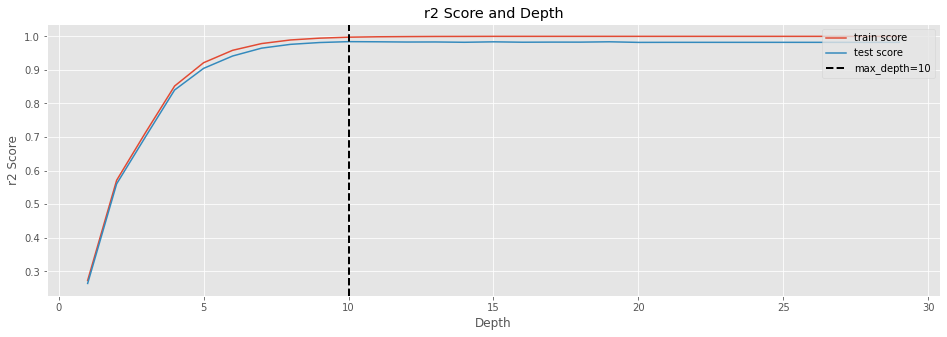

In [39]:
# plotting mean test and train scores with max_depth: 
cv_results['param_max_depth'] = cv_results['param_max_depth'].astype('int32')
plt.figure(figsize=(16,5))

# plotting r2 score vs alpha:
plt.plot(cv_results['param_max_depth'], cv_results['mean_train_score'])
plt.plot(cv_results['param_max_depth'], cv_results['mean_test_score'])
plt.axvline(10, color='black', ls='--', lw=2, label='max_depth=10')
plt.xlabel('Depth')
plt.ylabel('r2 Score')
plt.title("r2 Score and Depth")
plt.legend(['train score', 'test score', 'max_depth=10'], loc='upper right')
plt.show()

#### 7.6.2 Fitting Decision Tree Regression after GridsearchCV (All features)<a id='7.6.2_Fitting_Decision_Tree_Regression_after_GridsearchCV_(All_features)'></a>

In [41]:
# Create a DecisionTreeRegressor regressor: dtg_tuned_cv_1

max_depth = 10 #(Best GridsearchCV)
dtg_tuned_cv_1 = DecisionTreeRegressor(max_depth = max_depth,
                                       random_state=1981)

# Fit the regressor to the training data
dtg_tuned_cv_1.fit(X_train, y_train)

# Evaluate the model: R-Squared coefficient
print("R-Squared coefficient Tuned_final : {:.4f}".format(dtg_tuned_cv_1.score(X_test, y_test) * 100), '%')


# Predict on the test data: y_pred_dtg_cv_1
y_pred_dtg_cv_1 = dtg_tuned_cv_1.predict(X_test)


R-Squared coefficient Tuned_final : 98.5901 %


In [42]:
print("********Tuned_Alpha Ridge Regression Model Evaluation********")
print("-------------------------------------------------------------")
print("Tuned_Alpha Ridge Regression - r2 Score: {:.4f}".format(metrics.r2_score(y_test, y_pred_dtg_cv_1) * 100), '%')
print("-------------------------------------------------------------")
print("Tuned_Alpha Ridge Regression - MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_dtg_cv_1)))
print("-------------------------------------------------------------")
print("Tuned_Alpha Ridge Regression - MSE:{:.4f}".format(metrics.mean_squared_error(y_test, y_pred_dtg_cv_1)))
print("-------------------------------------------------------------")
print("Tuned_Alpha Ridge Regression - RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_dtg_cv_1))))
print("-------------------------------------------------------------")
print("Tuned_Alpha Ridge Regression - Variance Score:{:.4f}".format( metrics.explained_variance_score(y_test, y_pred_dtg_cv_1) * 100), '%')
print("-------------------------------------------------------------")

********Tuned_Alpha Ridge Regression Model Evaluation********
-------------------------------------------------------------
Tuned_Alpha Ridge Regression - r2 Score: 98.5901 %
-------------------------------------------------------------
Tuned_Alpha Ridge Regression - MAE: 26492.3718
-------------------------------------------------------------
Tuned_Alpha Ridge Regression - MSE:2083176473.4598
-------------------------------------------------------------
Tuned_Alpha Ridge Regression - RMSE:45641.8281
-------------------------------------------------------------
Tuned_Alpha Ridge Regression - Variance Score:98.5902 %
-------------------------------------------------------------


#### 7.6.3 GridSearchCV for most important features: 'sqft' and 'price_per_sqft'<a id='7.6.3_GridSearchCV_for_most_important_features:_sqft_and_price_per_sqft'></a> 

In [43]:
# Let's define/select our features:
features = ['sqft',  'price_per_sqft']

# And, Now let's define X and y:
X = df[features]
y = df.price

# Import train_test_split
from sklearn.model_selection import train_test_split


# Split into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=1981)

# Import StandardScaler:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler:
scaler = StandardScaler()

# Fit & transform  scaler to the data:
X_train = scaler.fit_transform(X_train.astype(np.float))
X_test = scaler.transform(X_test.astype(np.float))

In [44]:
# Import necessary modules
from sklearn.model_selection import GridSearchCV

max_depth = range(1,30)

# Set the parameters by cross-validation
params = [{'max_depth': max_depth}]

# Create a DecisionTreeRegressor: dtg_search_2
dtg_search_2 = DecisionTreeRegressor(random_state=1981)

#cross validation
folds = 5

# Setup the GridSearchCV object: dtg_cv_2
dtg_cv_2 = GridSearchCV(estimator = dtg_search_1, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, n_jobs=-1,
                        return_train_score=True,
                        verbose = 1)   

# Fit it to the training data
dtg_cv_2.fit(X_train, y_train) 


Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1981),
             n_jobs=-1, param_grid=[{'max_depth': range(1, 30)}],
             return_train_score=True, scoring='r2', verbose=1)

In [45]:
#checking the value of optimum number of parameters
print("Tuned Decision Tree Regression Parameters: {}".format(dtg_cv_2.best_params_))
print("Tuned Decision Tree - Best neg_mean_absolute_error is {:.4f}".format(dtg_cv_2.best_score_ * 100), "%")

Tuned Decision Tree Regression Parameters: {'max_depth': 19}
Tuned Decision Tree - Best neg_mean_absolute_error is 99.1460 %


In [46]:
cv_results = pd.DataFrame(dtg_cv_2.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.002807      0.000979         0.000400    4.895120e-04   
1        0.002601      0.000491         0.000801    4.005541e-04   
2        0.003800      0.000400         0.000605    4.937895e-04   
3        0.004800      0.000401         0.000800    4.000692e-04   
4        0.006201      0.000750         0.000600    4.897847e-04   
5        0.007600      0.000490         0.000599    4.893269e-04   
6        0.007799      0.000749         0.000401    4.911484e-04   
7        0.008600      0.000802         0.000601    4.903329e-04   
8        0.009399      0.001020         0.001001    1.689915e-06   
9        0.011399      0.000489         0.000401    4.907386e-04   
10       0.012600      0.000490         0.000801    4.006687e-04   
11       0.014400      0.000491         0.001001    1.815742e-06   
12       0.014800      0.000402         0.001000    1.607161e-06   
13       0.019998      0.005763         0.001002    2.119647e-06   
14       0.017598      0.001200         0.001200    4.010205e-04   
15       0.017597      0.001744         0.000859    4.447648e-04   
16       0.017198      0.000747         0.001001    2.198628e-06   
17       0.016400      0.000803         0.001000    2.720062e-06   
18       0.019801      0.002314         0.001403    4.895274e-04   
19       0.022800      0.008658         0.001202    4.009260e-04   
20       0.017998      0.001673         0.001003    9.488940e-07   
21       0.017999      0.002532         0.001402    4.902366e-04   
22       0.017398      0.001020         0.000999    1.761073e-06   
23       0.018999      0.004051         0.001201    4.006395e-04   
24       0.018200      0.003543         0.000800    3.999252e-04   
25       0.018001      0.002607         0.001200    4.011397e-04   
26       0.016398      0.001356         0.001201    3.993303e-04   
27       0.015800      0.000748         0.001199    3.991859e-04   
28       0.014995      0.001094         0.000601    4.908381e-04   

   param_max_depth             params  split0_test_score  split1_test_score  \
0                1   {'max_depth': 1}           0.263110           0.240125   
1                2   {'max_depth': 2}           0.587690           0.550830   
2                3   {'max_depth': 3}           0.711381           0.683035   
3                4   {'max_depth': 4}           0.851835           0.829889   
4                5   {'max_depth': 5}           0.916889           0.902938   
5                6   {'max_depth': 6}           0.952955           0.945455   
6                7   {'max_depth': 7}           0.975275           0.969021   
7                8   {'max_depth': 8}           0.985315           0.981644   
8                9   {'max_depth': 9}           0.989698           0.988157   
9               10  {'max_depth': 10}           0.992694           0.991164   
10              11  {'max_depth': 11}           0.994132           0.993590   
11              12  {'max_depth': 12}           0.994759           0.993995   
12              13  {'max_depth': 13}           0.995234           0.993144   
13              14  {'max_depth': 14}           0.995212           0.993484   
14              15  {'max_depth': 15}           0.995442           0.994284   
15              16  {'max_depth': 16}           0.995351           0.993455   
16              17  {'max_depth': 17}           0.995594           0.993222   
17              18  {'max_depth': 18}           0.995382           0.993554   
18              19  {'max_depth': 19}           0.995342           0.994493   
19              20  {'max_depth': 20}           0.995473           0.993173   
20              21  {'max_depth': 21}           0.995473           0.993173   
21              22  {'max_depth': 22}           0.995473           0.993173   
22              23  {'max_depth': 23}           0.995473           0.993173   
23              24  {'max_depth': 24}           0.995473           

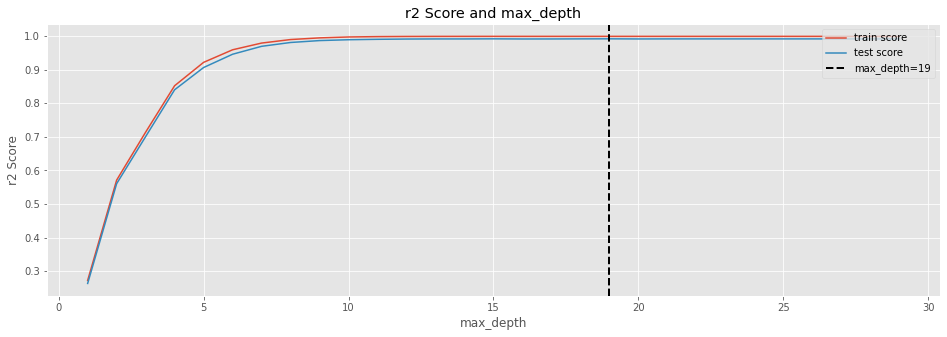

In [49]:
# plotting mean test and train scores with alpha 
cv_results['param_max_depth'] = cv_results['param_max_depth'].astype('int32')
plt.figure(figsize=(16,5))

# plotting r2 score vs alpha:
plt.plot(cv_results['param_max_depth'], cv_results['mean_train_score'])
plt.plot(cv_results['param_max_depth'], cv_results['mean_test_score'])
plt.axvline(19, color='black', ls='--', lw=2, label='max_depth=19')
plt.xlabel('max_depth')
plt.ylabel('r2 Score')
plt.title("r2 Score and max_depth")
plt.legend(['train score', 'test score', 'max_depth=19'], loc='upper right')
plt.show()

#### 7.6.4 Fitting Decision Tree Regression after GridsearchCV (most important features)<a id='7.6.4_Fitting_Decision_Tree_Regression_after_GridsearchCV_(most_important_features)'></a>

In [50]:
# Create a DecisionTreeRegressor regressor: dtg_tuned_cv_2
max_depth = 19 #(Best GridsearchCV)
dtg_tuned_cv_2 = DecisionTreeRegressor(max_depth = 19, 
                                       random_state=1981)

# Fit the regressor to the training data
dtg_tuned_cv_2.fit(X_train, y_train)

# Evaluate the model: R-Squared coefficient
print("R-Squared coefficient Tuned_final : {:.4f}".format(dtg_tuned_cv_2.score(X_test, y_test) * 100), '%')


# Predict on the test data: y_pred_dtg_cv_2
y_pred_dtg_cv_2 = dtg_tuned_cv_2.predict(X_test)

R-Squared coefficient Tuned_final : 99.2475 %


In [51]:
print("********Tuned_Alpha Ridge Regression Model Evaluation********")
print("-------------------------------------------------------------")
print("Tuned_Alpha Ridge Regression - r2 Score: {:.4f}".format(metrics.r2_score(y_test, y_pred_dtg_cv_2) * 100), '%')
print("-------------------------------------------------------------")
print("Tuned_Alpha Ridge Regression - MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_dtg_cv_2)))
print("-------------------------------------------------------------")
print("Tuned_Alpha Ridge Regression - MSE:{:.4f}".format(metrics.mean_squared_error(y_test, y_pred_dtg_cv_2)))
print("-------------------------------------------------------------")
print("Tuned_Alpha Ridge Regression - RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_dtg_cv_2))))
print("-------------------------------------------------------------")
print("Tuned_Alpha Ridge Regression - Variance Score:{:.4f}".format( metrics.explained_variance_score(y_test, y_pred_dtg_cv_2) * 100), '%')
print("-------------------------------------------------------------")

********Tuned_Alpha Ridge Regression Model Evaluation********
-------------------------------------------------------------
Tuned_Alpha Ridge Regression - r2 Score: 99.2475 %
-------------------------------------------------------------
Tuned_Alpha Ridge Regression - MAE: 15061.2890
-------------------------------------------------------------
Tuned_Alpha Ridge Regression - MSE:1111869136.9357
-------------------------------------------------------------
Tuned_Alpha Ridge Regression - RMSE:33344.7018
-------------------------------------------------------------
Tuned_Alpha Ridge Regression - Variance Score:99.2484 %
-------------------------------------------------------------


## 8. Decision Tree Regression Tuning Summary<a id='8_Decision_Tree_Regression_Tuning_Summary'></a>

As we can see below, We managed to improve our Decision Tree Regression Model by:
 * keeping only the most important features: 2 features ('sqft' and'price_per_sqft'), and
 * Hyperparameters Tuning using GridSearCV to determine best:
   * max_depth=10 when considering all features.
   * max_depth=19 when considering only the most important features: 'sqft' and'price_per_sqft'.
 * Variance Score has improved from 98.7884 % (Ridge - baseline) to 99.2484 %

|Model Tuning| r2 Score|    MAE  | MSE  | RMSE|Variance Score|
|:----------------------|:-------:|:-------:|:----:|:----:|:----:|
|Baseline (all features)                |98.7877 %|22346.9022|1791304373.7595|42323.8039|98.7884 %|
|Keeping 2 features (Most Important)    |99.2406 %|15058.3533|1122033204.6526|33496.7641|99.2412 %|
|Keeping 5 features                     |98.7992 %|19343.5318|1774295512.9909|42122.3873|98.7997 %|
|All features + max_depth=10            |98.5901 %|26492.3718|2083176473.4598|45641.8281|98.5902 %|
|Keeping 2 features (Most Important) + max_depth=19           |99.2475 %|15061.2890|1111869136.9357|33344.7018|99.2484 %|

## 9. Decision Tree Regression Actual vs Prediction Visualization<a id='9_Decision_Tree_Regression_Actual_vs_Prediction_Visualization'></a>

Text(0, 0.5, 'Prediction')

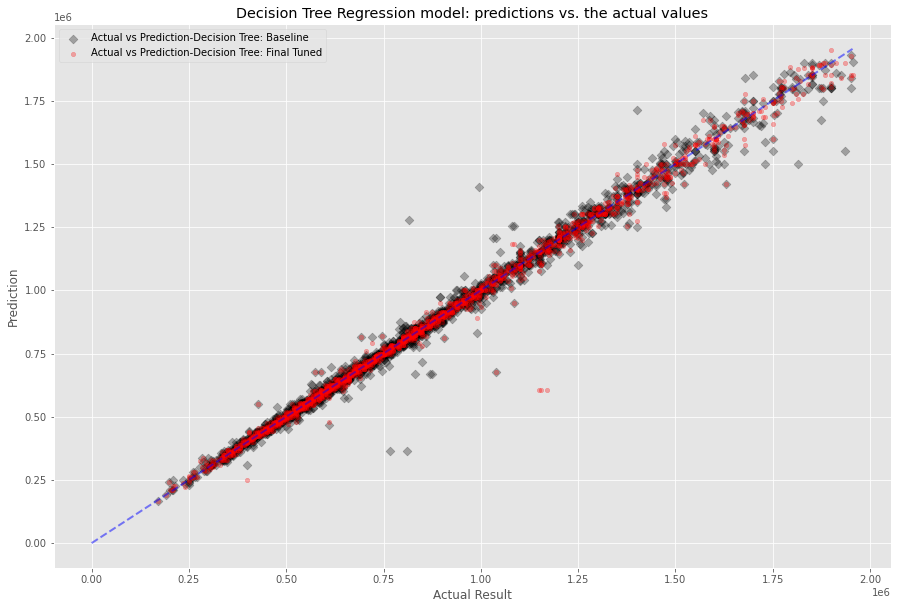

In [55]:
# Let's plot the predictions against the actual result. Use scatter()
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred_dtg, color='black', marker='D', s=40, alpha=0.3, label='Actual vs Prediction-Decision Tree: Baseline')
plt.scatter(y_test,y_pred_dtg_cv_2, color='red', marker='o', s=20, alpha=0.3,label='Actual vs Prediction-Decision Tree: Final Tuned')
plt.title('Decision Tree Regression model: predictions vs. the actual values')
plt.plot([0,(np.max(y_test))],[0,(np.max(y_test))], 'b--', linewidth=2, alpha=0.5)
plt.legend()
plt.xlabel('Actual Result')
plt.ylabel('Prediction')

In [56]:
final_dtg = pd.DataFrame({'SalePrice_Actual': y_test, 'SalePrice_Predicted_baseline': y_pred_dtg.round(3), 'SalePrice_Predicted_Tuned': y_pred_dtg_cv_2.round(3)})
final_dtg.head(30).sort_values(by='SalePrice_Actual', ascending=False)

SalePrice_Actual  SalePrice_Predicted_baseline  \
6219           1900000                     1800000.0   
696            1770000                     1795000.0   
2560           1600000                     1558500.0   
3249           1525000                     1592500.0   
1223           1478000                     1540000.0   
6756           1438000                     1450000.0   
1904           1375000                     1255000.0   
7028           1300000                     1300000.0   
6904           1216000                     1255000.0   
3982           1080000                     1110000.0   
4337            876000                      890000.0   
595             850000                      850000.0   
4489            850000                      865000.0   
7400            825000                      850000.0   
3136            821000                      790000.0   
5011            820000                      790000.0   
535             750000                      745450.0   
1851            745000                      760000.0   
1044            725000                      715000.0   
4969            705000                      745000.0   
6493            692000                      700000.0   
790             585000                      592500.0   
7422            540000                      520000.0   
5395            535000                      550000.0   
4768            525000                      520000.0   
4032            525000                      531750.0   
5130            505000                      500000.0   
5548            495000                      496000.0   
5320            335000                      339000.0   
4511            215000                      224950.0   

      SalePrice_Predicted_Tuned  
6219                  1805000.0  
696                   1795000.0  
2560                  1600000.0  
3249                  1515000.0  
1223                  1475000.0  
6756                  1441000.0  
1904                  1255000.0  
7028                  1330000.0  
6904                  1205781.0  
3982                  1110000.0  
4337                   890000.0  
595                    850000.0  
4489                   850000.0  
7400                   850000.0  
3136                   805000.0  
5011                   820000.0  
535                    767000.0  
1851                   770000.0  
1044                   720000.0  
4969                   760000.0  
6493                   700000.0  
790                    592250.0  
7422                   530000.0  
5395                   555000.0  
4768                   525000.0  
4032                   531750.0  
5130                   500000.0  
5548                   490000.0  
5320                   339000.0  
4511                   224950.0

## 10. Models next step:<a id='10_Models_next_step'></a>

Now, after building our 2nd Model: Decision Tree Regression, let's see if we can further improve our prediction using below algorithm:

 * Random Forests Regression.
 

## 9. Saving our Data<a id='9_Saving_our_data'></a>
Finally, let's save our final DataFrame with the new features:


In [ ]:
# Saving df_final_v1:
df_final_v1.to_csv(path_or_buf = "path" + "/pre_processing_df.csv", index=False)

In [58]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))